<a href="https://colab.research.google.com/github/fabriziobasso/Colab_backup/blob/main/mod_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **S4E10 - LOAN APPROVAL**

In [1]:
%%capture
!pip install -qq pytorch_tabnet
!pip install optuna
!pip install catboost
!pip install optuna-integration-pytorch-tabnet

from pytorch_tabnet.tab_model import TabNetRegressor

!pip install category-encoders
!pip install optuna-integration
!pip install colorama
#!pip install pyfiglet
!pip install keras-tuner --upgrade
!pip install keras-nlp
!pip install BorutaShap
!pip install --upgrade scikit-learn
!pip install scikit-lego
!pip install skops

from pytorch_tabnet.tab_model import TabNetRegressor

In [2]:
# Setup notebook
from pathlib import Path
import ipywidgets as widgets
import pandas as pd
import numpy as np
from pickle import load, dump
import json
import joblib
#import calplot as cal

# Graphic Libraries:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
# Set Style
sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5});
sns.despine(left=True, bottom=True, top=False, right=False);
mpl.rcParams['figure.dpi'] = 120;
mpl.rc('axes', labelsize=12);
plt.rc('xtick',labelsize=10);
plt.rc('ytick',labelsize=10);

mpl.rcParams['axes.spines.top'] = False;
mpl.rcParams['axes.spines.right'] = False;
mpl.rcParams['axes.spines.left'] = True;

# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)

# tool for Excel:
from openpyxl import load_workbook, Workbook
from openpyxl.drawing.image import Image
from openpyxl.styles import Border, Side, PatternFill, Font, GradientFill, Alignment
from openpyxl.worksheet.cell_range import CellRange

from openpyxl.formatting import Rule
from openpyxl.styles import Font, PatternFill, Border
from openpyxl.styles.differential import DifferentialStyle

# Bloomberg
#from xbbg import blp
from catboost import CatBoostRegressor, Pool, CatBoostClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from xgboost.callback import EarlyStopping

import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

# Time Management
from tqdm import tqdm
from datetime import date
from datetime import datetime
from pandas.tseries.offsets import BMonthEnd, QuarterEnd
import datetime
from pandas.tseries.offsets import BDay # BDay is business day, not birthday...
import datetime as dt
import click
import glob
import os
import gc
import re
import string

from ipywidgets import AppLayout
from ipywidgets import Dropdown, Layout, HTML, AppLayout, VBox, Label, HBox, BoundedFloatText, interact, Output

#from my_func import *

import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras
from keras import ops
from keras import layers

from keras.layers import Input, LSTM, Dense, Lambda, RepeatVector, Reshape
from keras.models import Model
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError

from keras.utils import FeatureSpace, plot_model

# Import libraries for Hypertuning
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch, GridSearch, BayesianOptimization

#from my_func import *

# preprocessing modules
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, RepeatedKFold, cross_val_score, cross_validate, GroupKFold, GridSearchCV, RepeatedStratifiedKFold, cross_val_predict

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   QuantileTransformer,
                                   PolynomialFeatures)

# metrics
import sklearn
#import skops.io as sio
from sklearn.metrics import (mean_squared_error,
                             root_mean_squared_error,
                             root_mean_squared_log_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss,
                             make_scorer)
# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  HuberRegressor,
                                  TweedieRegressor,
                                  QuantileRegressor,
                                  ARDRegression,
                                  TheilSenRegressor,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.ensemble import (AdaBoostRegressor,
                              AdaBoostClassifier,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              GradientBoostingClassifier,
                              StackingRegressor,
                              StackingClassifier,
                              HistGradientBoostingClassifier,
                              HistGradientBoostingRegressor,
                              ExtraTreesClassifier)

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

from sklearn.multioutput import RegressorChain
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

import itertools
import warnings
from openpyxl import load_workbook

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

import statsmodels.api as sm
from pylab import rcParams
import scipy.stats as ss

warnings.filterwarnings('ignore')
#import pyfiglet
#plt.style.use('fivethirtyeight')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


<Figure size 640x480 with 0 Axes>

In [3]:
sns.set({"axes.facecolor"       : "#ffffff",
         "figure.facecolor"     : "#ffffff",
         "axes.edgecolor"       : "#000000",
         "grid.color"           : "#ffffff",
         "font.family"          : ['Cambria'],
         "axes.labelcolor"      : "#000000",
         "xtick.color"          : "#000000",
         "ytick.color"          : "#000000",
         "grid.linewidth"       : 0.5,
         'grid.alpha'           :0.5,
         "grid.linestyle"       : "--",
         "axes.titlecolor"      : 'black',
         'axes.titlesize'       : 12,
         'axes.labelweight'     : "bold",
         'legend.fontsize'      : 7.0,
         'legend.title_fontsize': 7.0,
         'font.size'            : 7.5,
         'xtick.labelsize'      : 7.5,
         'ytick.labelsize'      : 7.5,
        });

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
# Set Style
mpl.rcParams['figure.dpi'] = 120;

# import font colors
from colorama import Fore, Style, init

# Making sklearn pipeline outputs as dataframe:-
pd.set_option('display.max_columns', 100);
pd.set_option('display.max_rows', 50);

sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

init(autoreset=True)

<Figure size 960x660 with 0 Axes>

In [4]:
from tqdm import tqdm
from itertools import product

import numpy as np
import pandas as pd
import gc
import matplotlib.pyplot as plt
import seaborn as sns

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import GroupKFold
from sklearn.impute import SimpleImputer
import torch

import warnings
warnings.filterwarnings("ignore")

# Connect to Colab:#
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


<div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:100%; font-family:Arial, sans-serif; background-color:#A8DADC; color:#1D3557; overflow:hidden; box-shadow:0 3px 6px rgba(0, 0, 0, 0.2);">
    <h3>Loading and Preprocessing Data for Compatibility</h3>
</div>


In [5]:
df_train = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E10/train.csv')

df_test = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E10/test.csv')

df_train_orig = pd.read_csv(
    '/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E10/credit_risk_dataset.csv'
)

df_subm = pd.read_csv(
    "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/sample_submission.csv")

# df_orig = pd.read_csv(
#     "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/Insurance Premium Prediction Dataset.csv",
#      parse_dates=['Policy Start Date'],
#     #     index_col='id',
# )

In [6]:
df_train.head()
df_train.shape,df_test.shape

((58645, 13), (39098, 12))

In [7]:
def plot_scatter(x="feat1",y="feat2", df=df_train):

  plt.figure(figsize=(5,5))
  plt.scatter(df[x],df[y])
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()

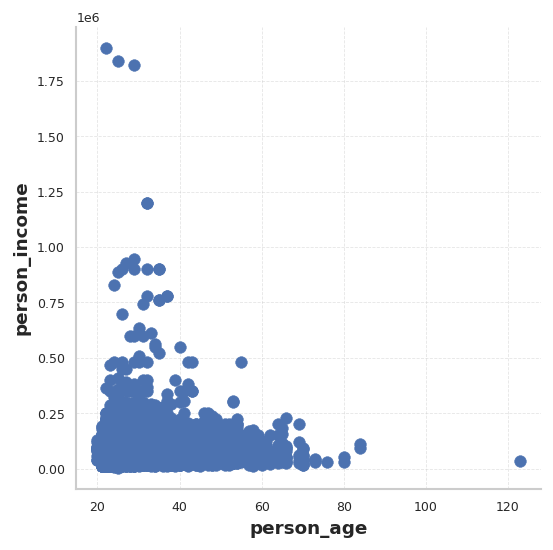

In [8]:
plot_scatter(x="person_age",y="person_income")

In [70]:
df_train["person_emp_length"].describe()

,person_emp_length
count,58645.000000
mean,4.701015
std,3.959784
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,123.000000


In [10]:
df_train[df_train["cb_person_cred_hist_length"]>0.75*df_train["person_age"]]
#np.round(df_train["cb_person_cred_hist_length"].mean(),0).astype(int)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
11996,11996,31,117516,MORTGAGE,3.0,MEDICAL,C,21000,13.49,0.18,N,24,0
21827,21827,28,186480,MORTGAGE,2.0,PERSONAL,A,10000,5.42,0.05,N,29,0


In [11]:
df_train["loat_to_income_diff"] = (df_train["loan_amnt"] / df_train["person_income"]) - df_train["loan_percent_income"]
df_train["loat_to_income_real"] = np.round((df_train["loan_amnt"] / df_train["person_income"]),2)
df_train.head()
print(df_train.shape)
df_train[((df_train["loat_to_income_diff"]<=-0.2)|(df_train["loat_to_income_diff"]>=0.2))]

(58645, 15)


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,loat_to_income_diff,loat_to_income_real
729,729,22,25000,MORTGAGE,7.0,EDUCATION,C,14000,12.84,0.05,Y,2,1,0.510000,0.56
1296,1296,25,15436,MORTGAGE,8.0,MEDICAL,B,7125,9.99,0.04,N,4,1,0.421583,0.46
4455,4455,22,95004,MORTGAGE,0.0,PERSONAL,B,2225,10.95,0.26,N,4,0,-0.236580,0.02
7965,7965,37,21600,RENT,1.0,EDUCATION,E,20000,18.39,0.10,Y,13,1,0.825926,0.93
11432,11432,27,65004,RENT,1.0,VENTURE,B,20000,11.83,0.03,N,8,0,0.277673,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54527,54527,22,25000,MORTGAGE,0.0,EDUCATION,D,15000,13.67,0.06,N,4,0,0.540000,0.60
54855,54855,35,36960,RENT,8.0,PERSONAL,D,18000,14.61,0.04,N,10,0,0.447013,0.49
54980,54980,22,69000,RENT,0.0,VENTURE,D,3775,18.25,0.59,N,4,1,-0.535290,0.05
55372,55372,24,14400,RENT,0.0,VENTURE,D,10000,15.33,0.07,N,4,1,0.624444,0.69


In [12]:
df_train.loc[df_train["loat_to_income_diff"] <= -0.2, "loan_amnt"] = (df_train.loc[df_train["loat_to_income_diff"] <= -0.2, "person_income"]*df_train.loc[df_train["loat_to_income_diff"] <= -0.2, "loan_percent_income"]).values
df_train.loc[df_train["loat_to_income_diff"] >= 0.2, "person_income"] = (df_train.loc[df_train["loat_to_income_diff"] >= 0.2, "loan_amnt"]/df_train.loc[df_train["loat_to_income_diff"] >= 0.2, "loan_percent_income"]).values

In [13]:
df_train["loat_to_income_diff"] = (df_train["loan_amnt"] / df_train["person_income"]) - df_train["loan_percent_income"]
df_train["loat_to_income_real"] = np.round((df_train["loan_amnt"] / df_train["person_income"]),2)
df_train.head()
print(df_train.shape)
df_train[((df_train["loat_to_income_diff"]<=-0.2)|(df_train["loat_to_income_diff"]>=0.2))]

(58645, 15)


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,loat_to_income_diff,loat_to_income_real


In [14]:
df_test["loat_to_income_diff"] = (df_test["loan_amnt"] / df_test["person_income"]) - df_test["loan_percent_income"]
df_test["loat_to_income_real"] = (df_test["loan_amnt"] / df_test["person_income"])

df_test[(df_test["loat_to_income_diff"]<=-0.10)|(df_test["loat_to_income_diff"]>=0.10)]

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loat_to_income_diff,loat_to_income_real
607,59252,36,170004,MORTGAGE,9.0,HOMEIMPROVEMENT,A,5500,7.88,0.29,N,15,-0.257648,0.032352
1480,60125,29,12000,MORTGAGE,8.0,MEDICAL,A,9800,6.76,0.08,N,6,0.736667,0.816667
2148,60793,22,95000,MORTGAGE,1.0,MEDICAL,C,3500,11.54,0.44,Y,4,-0.403158,0.036842
2176,60821,27,110000,MORTGAGE,11.0,MEDICAL,A,3000,7.90,0.25,N,9,-0.222727,0.027273
2545,61190,25,52000,RENT,10.0,MEDICAL,C,3000,14.65,0.53,Y,2,-0.472308,0.057692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37913,96558,29,58650,MORTGAGE,9.0,MEDICAL,D,25000,15.37,0.29,N,8,0.136257,0.426257
37920,96565,22,20004,RENT,1.0,EDUCATION,A,6500,8.59,0.03,N,4,0.294935,0.324935
37929,96574,22,20000,MORTGAGE,4.0,DEBTCONSOLIDATION,B,6000,10.46,0.03,N,4,0.270000,0.300000
38005,96650,27,40000,MORTGAGE,11.0,DEBTCONSOLIDATION,A,35000,7.49,0.09,N,9,0.785000,0.875000


**Descriptions of Loan Data**

Descriptions for the column names based on the data provided:

* **id**: Unique identifier for each record.
* **person_age**: Age of the individual, categorized into ranges.
* **person_income**: Income of the individual, categorized into income ranges.
* **person_home_ownership**: Homeownership status, which includes categories like 'RENT', 'MORTGAGE', etc.
* **person_emp_length**: Employment length of the individual, categorized into ranges based on years.
* **loan_intent**: The purpose of the loan, with categories such as 'EDUCATION', 'MEDICAL', etc.
* **loan_grade**: The credit grade of the loan, such as 'A', 'B', etc.
* **loan_amnt**: Loan amount, categorized into ranges.
* **loan_int_rate**: Loan interest rate, categorized into percentage ranges.
* **loan_percent_income**: Percentage of the individual’s income that the loan represents, categorized into - ranges.
* **cb_person_default_on_file**: Whether the person has a history of loan default, with values 'true' or 'false'.
* **cb_person_cred_hist_length**: Length of the individual’s credit history, categorized into ranges.
* **loan_status**: with values representing whether the loan status approval( binary values)

The dataset is a about loan applications, including personal, financial, and loan details. It's likely used for predicting whether a person will default on a loan, making it a binary classification problem. The goal is to figure out which applicants are at higher risk of not paying back their loans based on their age, income, employment, loan purpose, credit history, and other related information.

In [103]:
class Config:

    state = 42
    n_splits = 10
    early_stop = 200

    target = 'loan_status'
    train = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E10/train.csv')
    test = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E10/test.csv')
    submission = pd.read_csv( "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E10/sample_submission.csv")
    train_org = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E10/credit_risk_dataset.csv")

    original_data = 'Y'
    outliers = 'N'
    log_trf = 'Y'
    scaler_trf = 'Y'
    feature_eng = 'Y'
    missing = 'Y'
    force_normalization="Y"
    log_trans_cols = ["person_age","person_income","loan_amnt","income_per_year_emp","debt_to_credit_hist_ratio","int_per_year_emp",
                      "loan_amt_per_emp_year","loan_int_emp_interaction","loan_amt_credit_hist_age_interaction","age_interaction"]
    force_norm_cols = ["person_emp_length","loan_percent_income","interest_to_income","int_to_cred_hist"]

In [104]:
class Preprocessing():

    def __init__(self):
        self.train = Config.train
        self.test = Config.test
        self.targets = Config.target

        self.prp_data()

    def prp_data(self):

        if Config.original_data == 'Y':
            self.train = pd.concat([self.train, Config.train_org], ignore_index=True).drop_duplicates(ignore_index=True)

        self.train = self.train.drop(['id'], axis=1)
        self.test = self.test.drop(['id'], axis=1)

        self.cat_features = self.train.drop(self.targets, axis=1).select_dtypes(include=['object', 'bool']).columns.tolist()
        self.num_features = self.train.drop(self.targets, axis=1).select_dtypes(exclude=['object', 'bool']).columns.tolist()

        self.train = self.reduce_mem(self.train)
        self.test = self.reduce_mem(self.test)
        return self

    def reduce_mem(self, df):

        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', "uint16", "uint32", "uint64"]

        for col in df.columns:
            col_type = df[col].dtypes

            if col_type in numerics:
                c_min = df[col].min()
                c_max = df[col].max()

                if "int" in str(col_type):
                    if c_min >= np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min >= np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min >= np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min >= np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)
                else:
                    if c_min >= np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                        df[col] = df[col].astype(np.float32)
                    if c_min >= np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float64)

        return df

In [105]:
class EDA(Config, Preprocessing):

    def __init__(self):
        super().__init__()

        self.data_info()
        self.heatmap()
        self.dist_plots()
        self.cat_feature_plots()
        self.target_pie()

    def data_info(self):

        for data, label in zip([self.train, self.test], ['Train', 'Test']):
            table_style = [{'selector': 'th:not(.index_name)',
                            'props': [('background-color', 'slategrey'),
                                      ('color', '#FFFFFF'),
                                      ('font-weight', 'bold'),
                                      ('border', '1px solid #DCDCDC'),
                                      ('text-align', 'center')]
                            },
                            {'selector': 'tbody td',
                             'props': [('border', '1px solid #DCDCDC'),
                                       ('font-weight', 'normal')]
                            }]
            print(Style.BRIGHT+Fore.RED+f'\n{label} head\n')
            display(data.head().style.set_table_styles(table_style))

            print(Style.BRIGHT+Fore.RED+f'\n{label} info\n'+Style.RESET_ALL)
            display(data.info())

            print(Style.BRIGHT+Fore.RED+f'\n{label} describe\n')
            display(data.describe().drop(index='count', columns=self.targets, errors = 'ignore').T
                    .style.set_table_styles(table_style).format('{:.3f}'))

            print(Style.BRIGHT+Fore.RED+f'\n{label} missing values\n'+Style.RESET_ALL)
            display(data.isna().sum())
        return self

    def heatmap(self):
        print(Style.BRIGHT+Fore.RED+f'\nCorrelation Heatmap\n')
        plt.figure(figsize=(7,7))
        corr = self.train.select_dtypes(exclude='object').corr(method='pearson')
        sns.heatmap(corr, fmt = '0.2f', cmap = 'Blues', annot=True, cbar=False)
        plt.show()

    def dist_plots(self):

        print(Style.BRIGHT+Fore.RED+f"\nDistribution analysis - Numerical\n")
        df = pd.concat([self.train[self.num_features].assign(Source = 'Train'),
                        self.test[self.num_features].assign(Source = 'Test'),],
                        axis=0, ignore_index = True)

        fig, axes = plt.subplots(len(self.num_features), 2 ,figsize = (18, len(self.num_features) * 6),
                                 gridspec_kw = {'hspace': 0.3,
                                                'wspace': 0.2,
                                                'width_ratios': [0.70, 0.30]
                                               }
                                )
        for i,col in enumerate(self.num_features):
            ax = axes[i,0]
            sns.kdeplot(data = df[[col, 'Source']], x = col, hue = 'Source',
                        palette = ['royalblue', 'tomato'], ax = ax, alpha=0.7, linewidth = 2
                       )
            ax.set(xlabel = '', ylabel = '')
            ax.set_title(f"\n{col}")
            ax.grid('--',alpha=0.7)

            ax = axes[i,1]
            sns.boxplot(data = df, y = col, x=df.Source, width = 0.5,
                        linewidth = 1, fliersize= 1,
                        ax = ax, palette=['royalblue', 'tomato']
                       )
            ax.set_title(f"\n{col}")
            ax.set(xlabel = '', ylabel = '')
            ax.tick_params(axis='both', which='major')
            ax.set_xticklabels(['Train', 'Test'])

        plt.tight_layout()
        plt.show()

    def cat_feature_plots(self):
        print(Style.BRIGHT+Fore.RED+f"\nDistribution analysis - Categorical\n")
        fig, axes = plt.subplots(len(self.cat_features), 2 ,figsize = (18, len(self.cat_features) * 6),
                                 gridspec_kw = {'hspace': 0.5,
                                                'wspace': 0.2,
                                               }
                                )

        for i, col in enumerate(self.cat_features):

            ax = axes[i,0]
            sns.barplot(data=self.train[col].value_counts().nlargest(10).reset_index(), x=col, y='count', ax=ax, color='royalblue', alpha=0.7)
            ax.set(xlabel = '', ylabel = '')
            ax.set_title(f"\n{col} Train")

            ax = axes[i,1]
            sns.barplot(data=self.train[col].value_counts().nlargest(10).reset_index(), x=col, y='count', ax=ax, color='tomato', alpha=0.7)
            ax.set(xlabel = '', ylabel = '')
            ax.set_title(f"\n{col} Test")

        plt.tight_layout()
        plt.show()

    def target_pie(self):
        print(Style.BRIGHT+Fore.RED+f"\nTarget feature distribution\n")
        targets = self.train[self.targets]
        plt.figure(figsize=(6, 6))
        plt.pie(targets.value_counts(), labels=targets.value_counts().index, autopct='%1.2f%%', colors=palette_9)
        plt.show()

## 1.0 EDA


Train head



,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.000000,EDUCATION,B,6000,11.490000,0.170000,N,14,0
1,22,56000,OWN,6.000000,MEDICAL,C,4000,13.350000,0.070000,N,2,0
2,29,28800,OWN,8.000000,PERSONAL,A,6000,8.900000,0.210000,N,10,0
3,30,70000,RENT,14.000000,VENTURE,B,12000,11.110000,0.170000,N,5,0
4,22,60000,RENT,2.000000,MEDICAL,A,6000,6.920000,0.100000,N,3,0



Train info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91061 entries, 0 to 91060
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  91061 non-null  int32  
 1   person_income               91061 non-null  int32  
 2   person_home_ownership       91061 non-null  object 
 3   person_emp_length           90174 non-null  float32
 4   loan_intent                 91061 non-null  object 
 5   loan_grade                  91061 non-null  object 
 6   loan_amnt                   91061 non-null  int32  
 7   loan_int_rate               87966 non-null  float32
 8   loan_percent_income         91061 non-null  float32
 9   cb_person_default_on_file   91061 non-null  object 
 10  cb_person_cred_hist_length  91061 non-null  int32  
 11  loan_status                 91061 non-null  int32  
dtypes: float32(3), int32(5), object(4)
memory usage: 5.6+ MB


None


Train describe



,mean,std,min,25%,50%,75%,max
person_age,27.621,6.150,20.000,23.000,26.000,30.000,144.000
person_income,64774.321,47922.855,4000.000,40000.000,57000.000,78000.000,6000000.000
person_emp_length,4.732,4.026,0.000,2.000,4.000,7.000,123.000
loan_amnt,9351.508,5848.017,500.000,5000.000,8000.000,12000.000,35000.000
loan_int_rate,10.791,3.109,5.420,7.880,10.950,13.110,23.220
loan_percent_income,0.163,0.097,0.000,0.090,0.140,0.220,0.830
cb_person_cred_hist_length,5.813,4.040,2.000,3.000,4.000,8.000,30.000



Train missing values



,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,887
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3095
loan_percent_income,0
cb_person_default_on_file,0



Test head



,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,69000,RENT,3.000000,HOMEIMPROVEMENT,F,25000,15.760000,0.360000,N,2
1,26,96000,MORTGAGE,6.000000,PERSONAL,C,10000,12.680000,0.100000,Y,4
2,26,30000,RENT,5.000000,VENTURE,E,4000,17.190001,0.130000,Y,2
3,33,50000,RENT,4.000000,DEBTCONSOLIDATION,A,7000,8.900000,0.140000,N,7
4,26,102000,MORTGAGE,8.000000,HOMEIMPROVEMENT,D,15000,16.320000,0.150000,Y,4



Test info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  39098 non-null  int32  
 1   person_income               39098 non-null  int32  
 2   person_home_ownership       39098 non-null  object 
 3   person_emp_length           39098 non-null  float32
 4   loan_intent                 39098 non-null  object 
 5   loan_grade                  39098 non-null  object 
 6   loan_amnt                   39098 non-null  int32  
 7   loan_int_rate               39098 non-null  float32
 8   loan_percent_income         39098 non-null  float32
 9   cb_person_default_on_file   39098 non-null  object 
 10  cb_person_cred_hist_length  39098 non-null  int32  
dtypes: float32(3), int32(4), object(4)
memory usage: 2.2+ MB


None


Test describe



,mean,std,min,25%,50%,75%,max
person_age,27.567,6.033,20.000,23.000,26.000,30.000,94.000
person_income,64060.461,37955.829,4000.000,42000.000,58000.000,75885.000,1900000.000
person_emp_length,4.687,3.868,0.000,2.000,4.000,7.000,42.000
loan_amnt,9251.466,5576.255,700.000,5000.000,8000.000,12000.000,35000.000
loan_int_rate,10.661,3.020,5.420,7.880,10.750,12.990,22.110
loan_percent_income,0.160,0.092,0.000,0.090,0.140,0.210,0.730
cb_person_cred_hist_length,5.831,4.072,2.000,3.000,4.000,8.000,30.000



Test missing values



,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_default_on_file,0



Correlation Heatmap



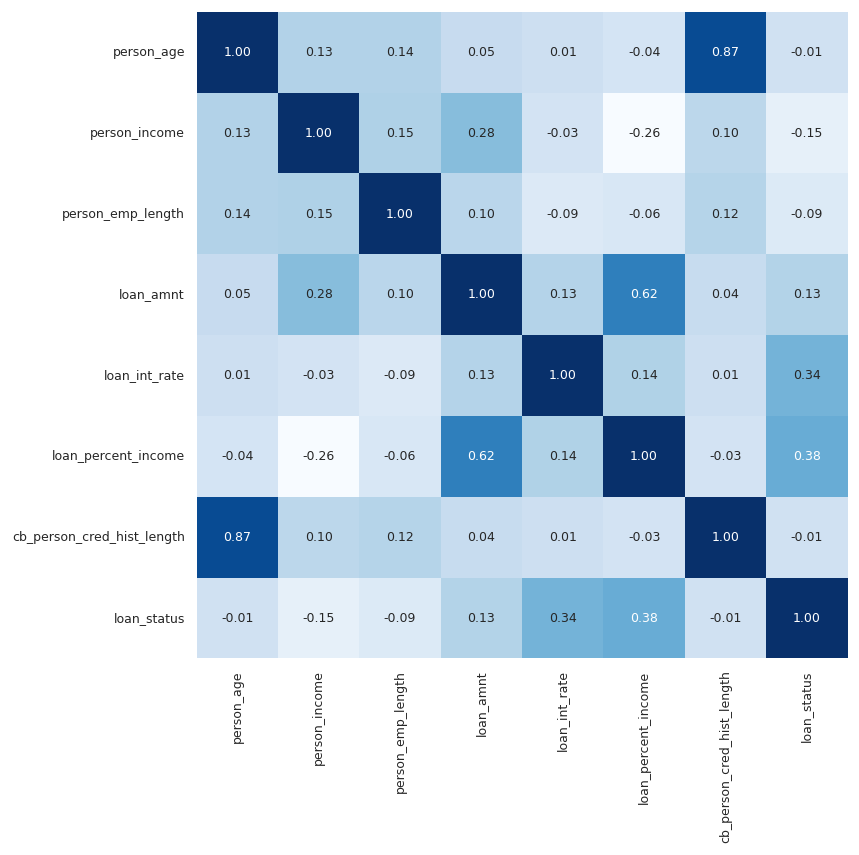


Distribution analysis - Numerical



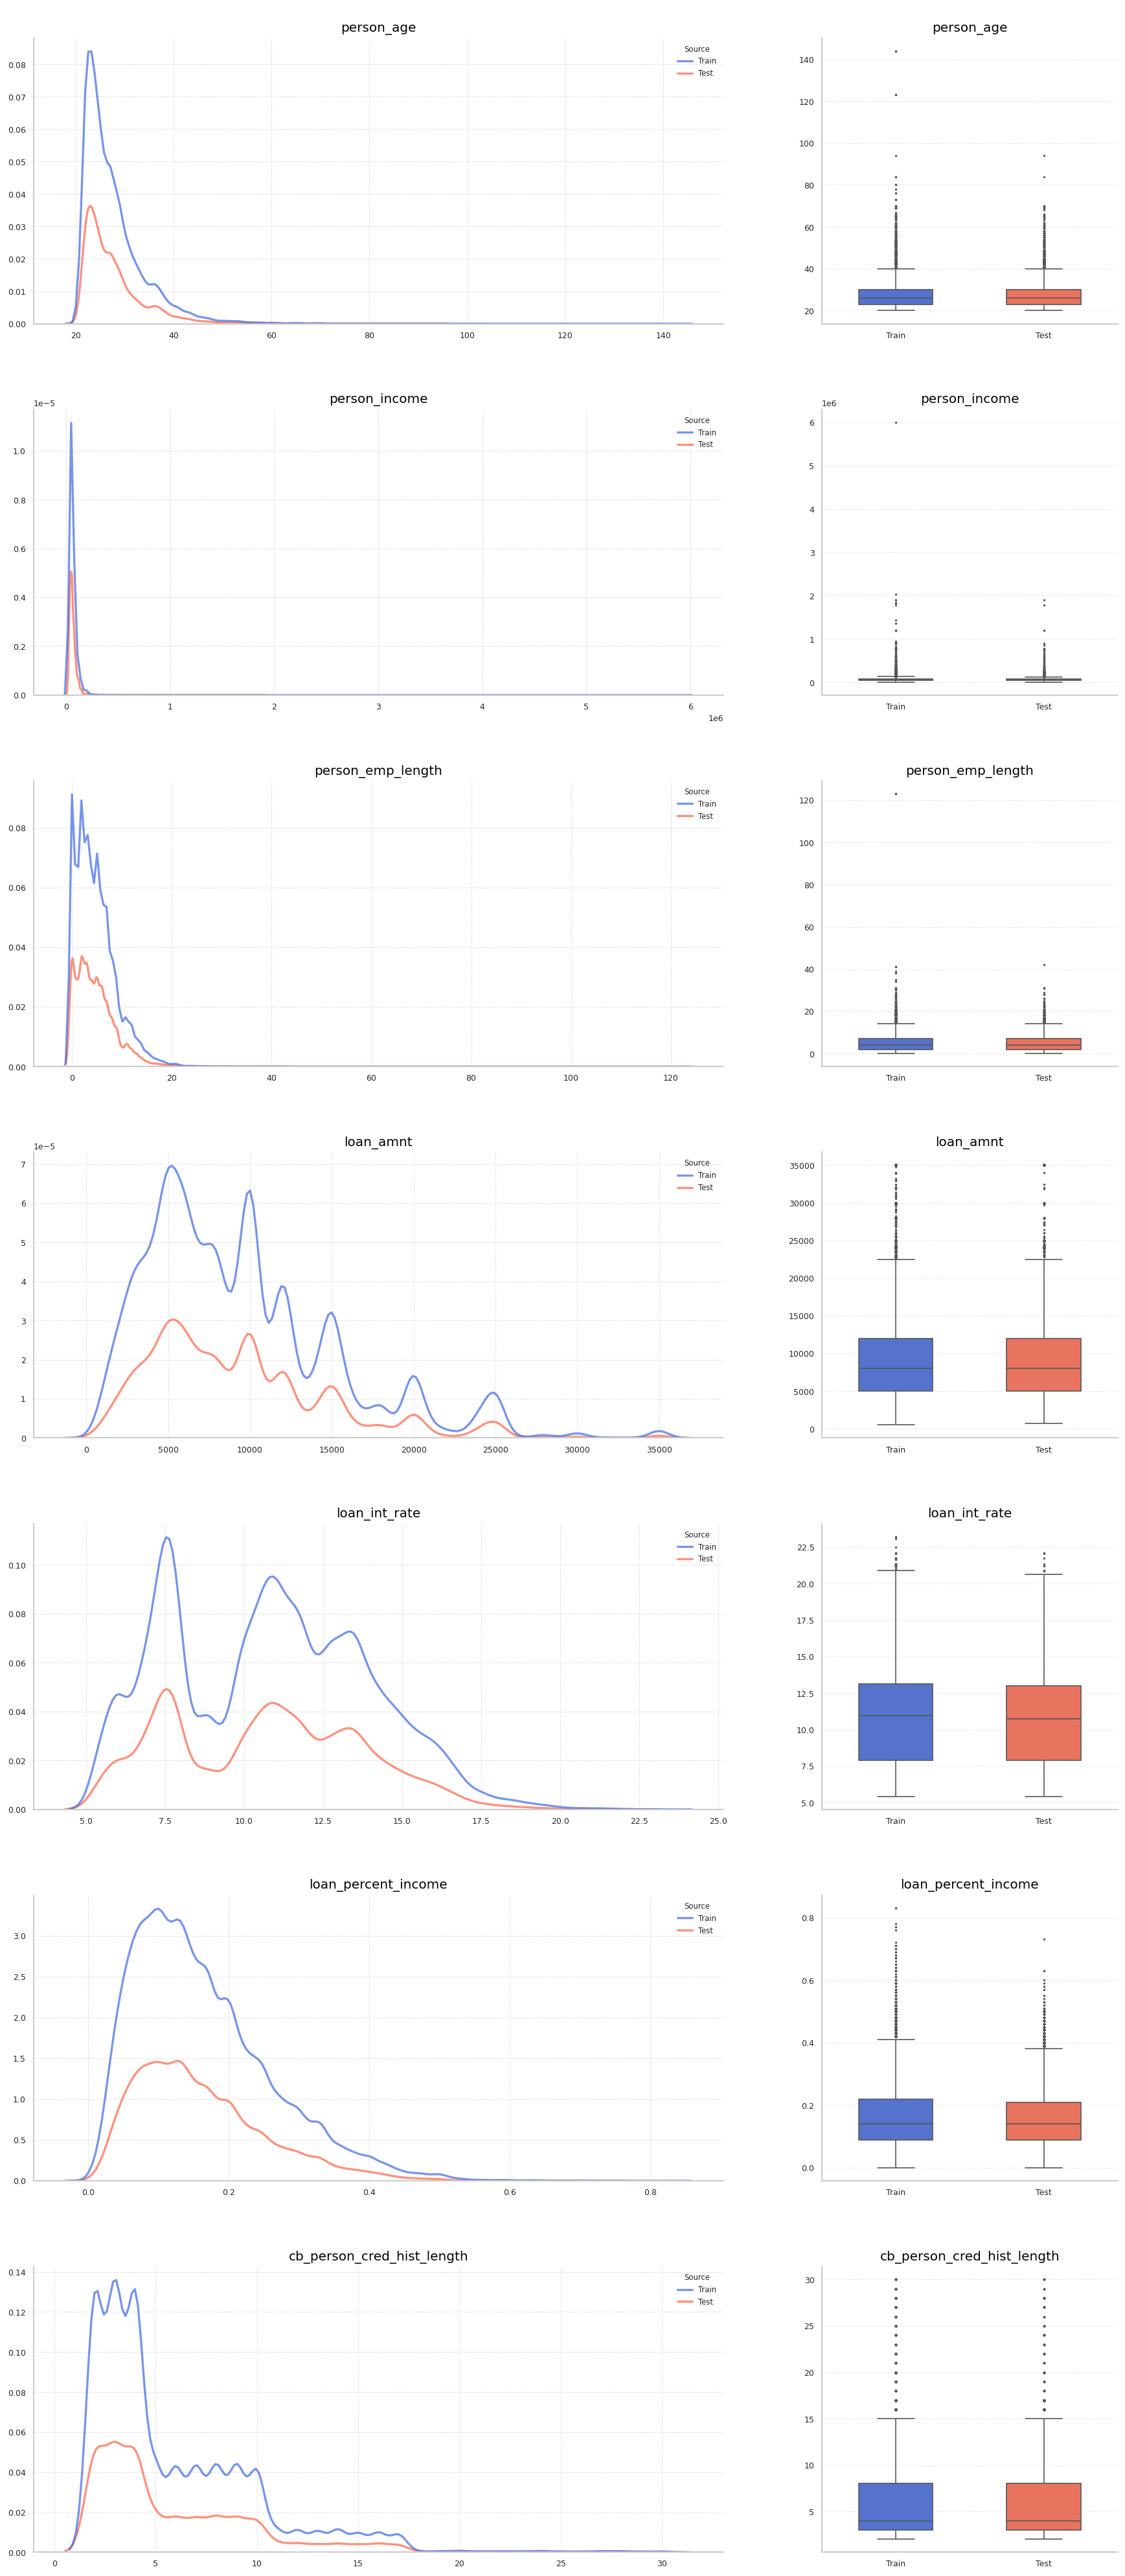


Distribution analysis - Categorical



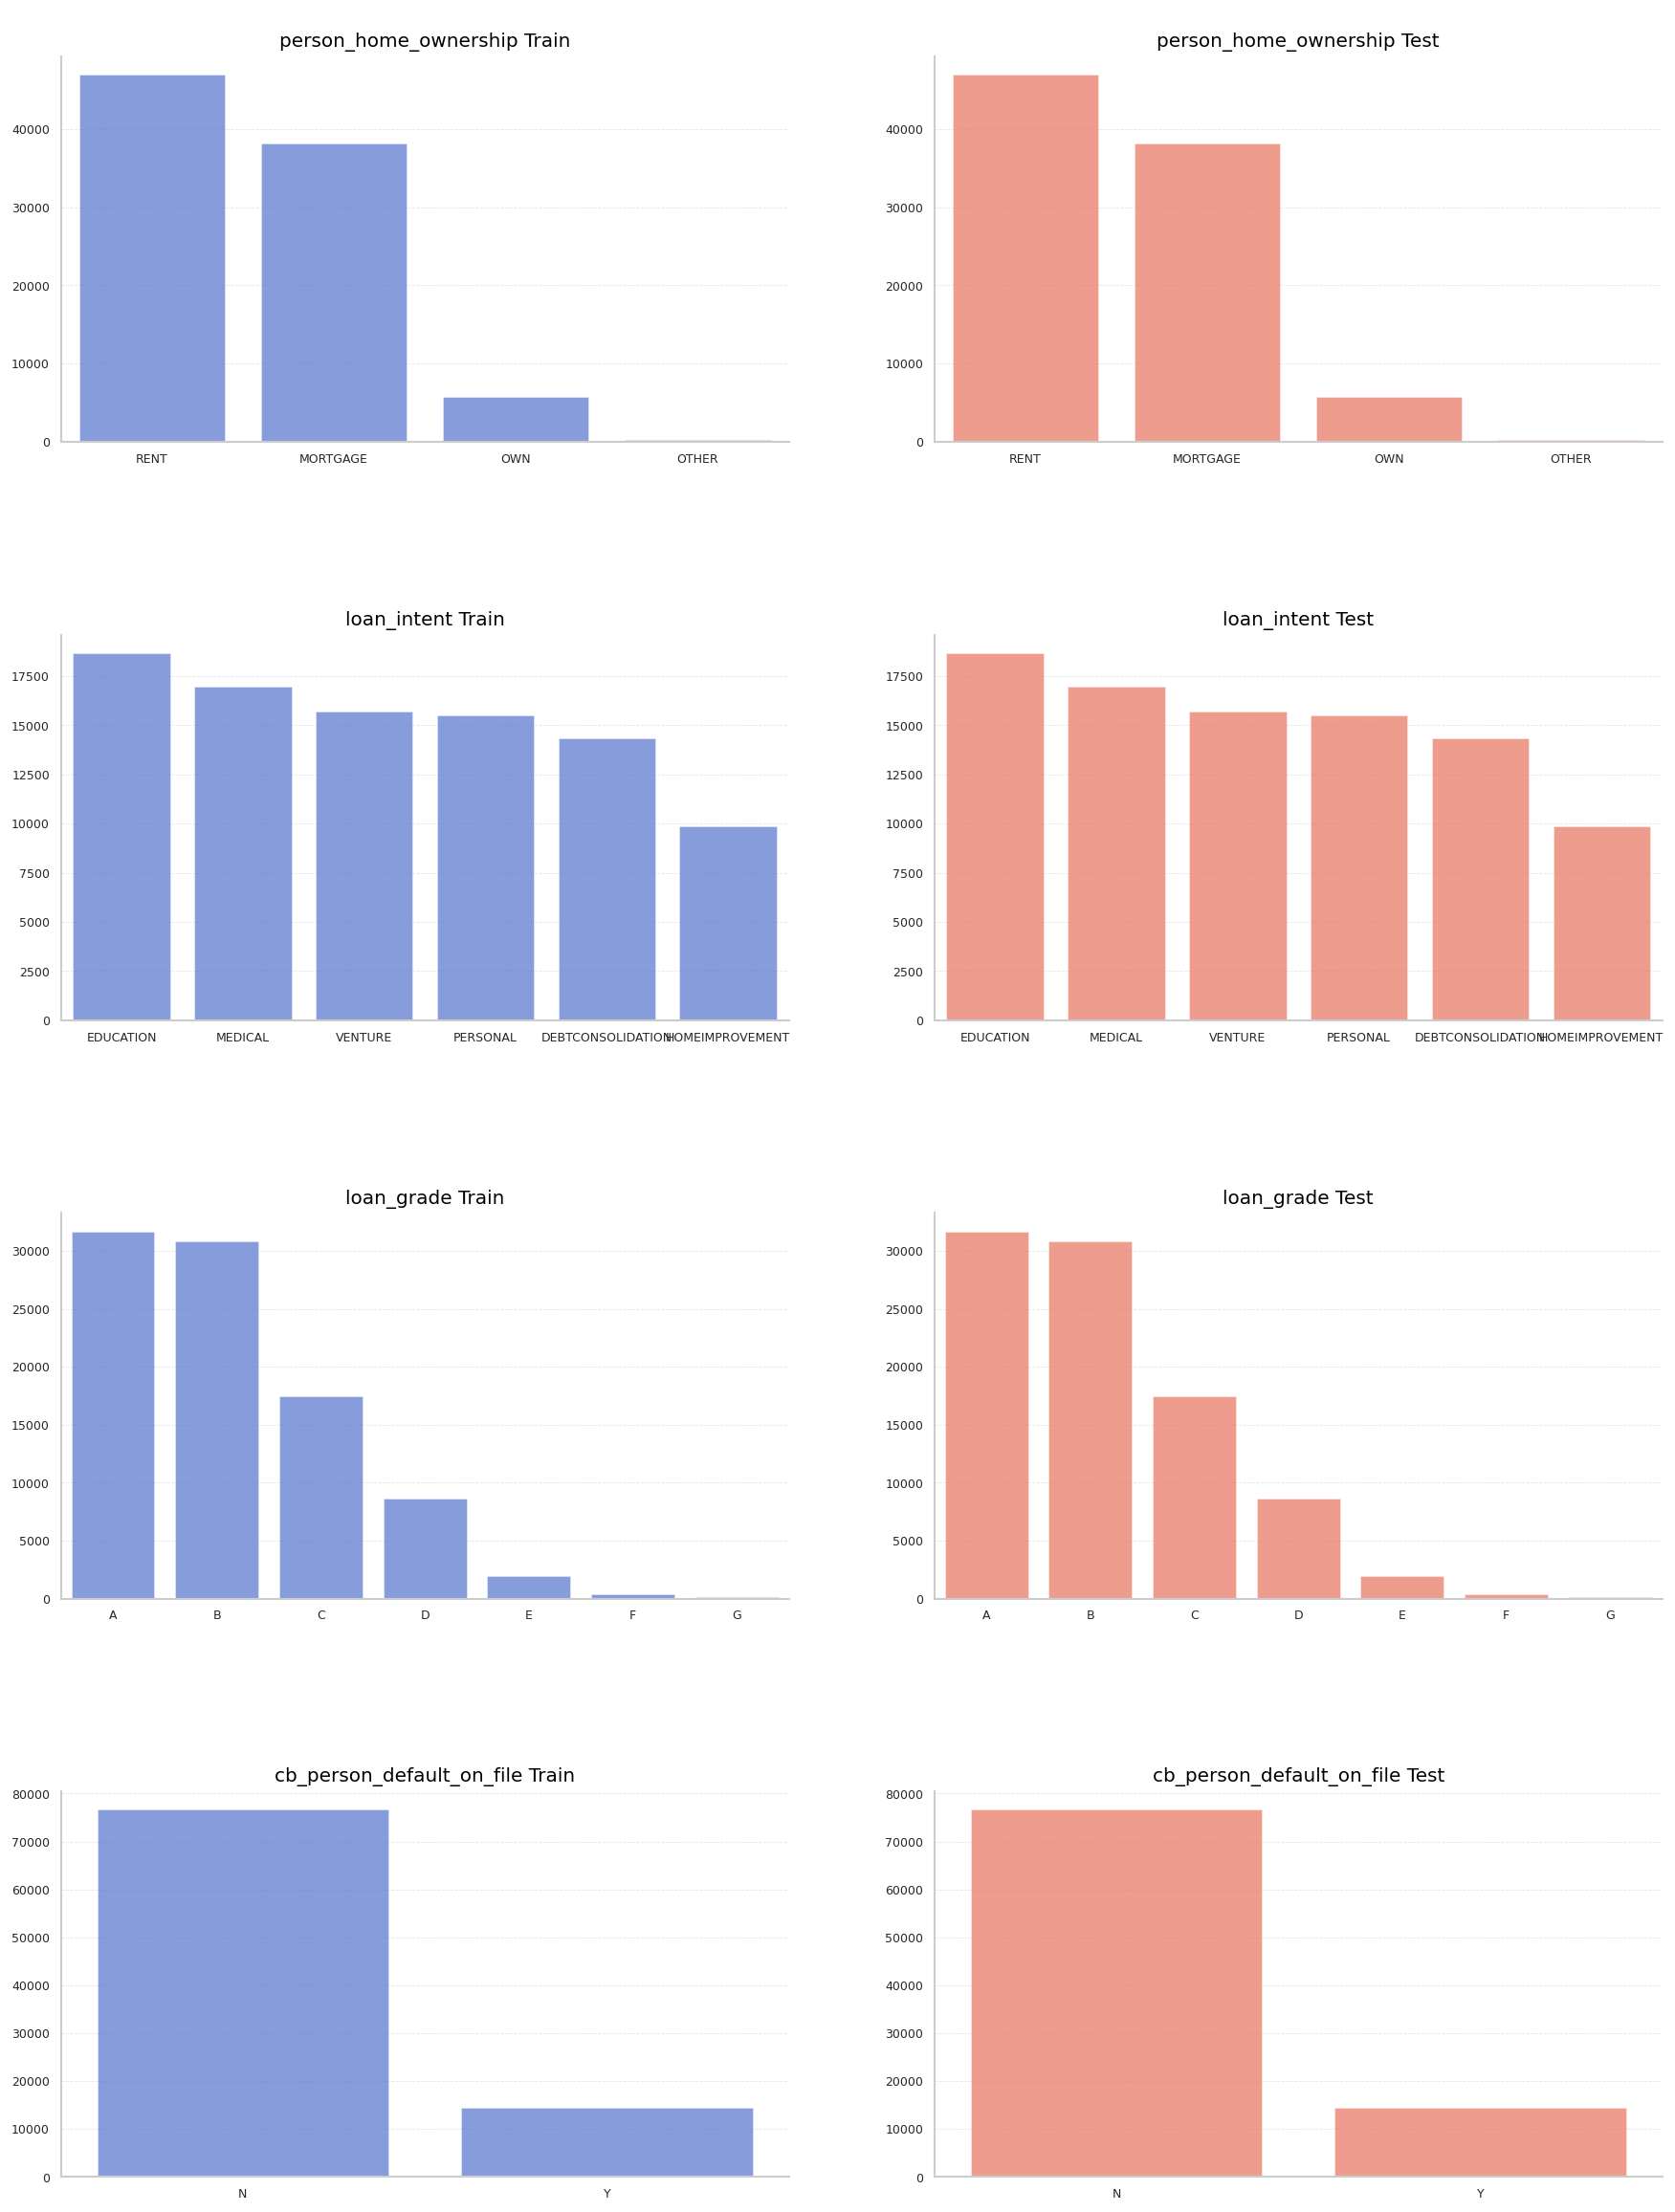


Target feature distribution



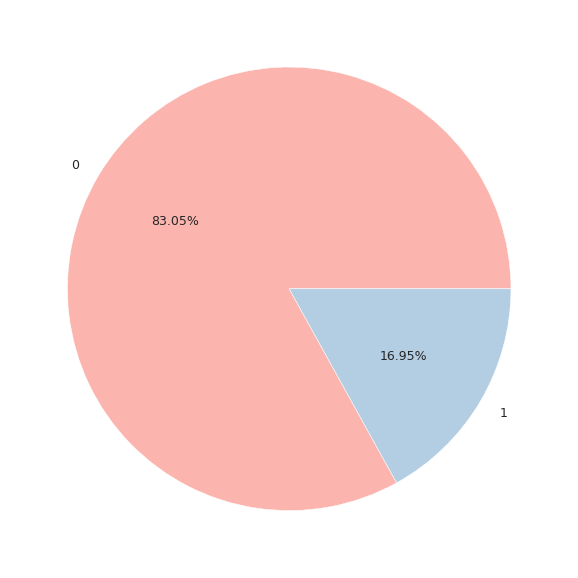

In [106]:
eda = EDA()

## 2.0 Data Transformation and Feature Negeneering:

In [109]:
class Transform(Config, Preprocessing):

    def __init__(self):
        super().__init__()
        if self.missing == 'Y':
            self.missing_values()

        self.train_raw = self.train.copy()

        if self.feature_eng == 'Y':
            self.train = self.new_features(self.train)
            self.test = self.new_features(self.test)
            self.train_raw = self.new_features(self.train_raw)

        self.num_features = self.train.drop(self.target, axis=1).select_dtypes(exclude=['object', 'bool']).columns.tolist()
        self.cat_features = self.train.drop(self.target, axis=1).select_dtypes(include=['object', 'bool']).columns.tolist()

        if self.outliers == 'Y':
            self.remove_outliers()

        if self.log_trf == 'Y':
            self.log_transformation()

        if self.force_normalization == 'Y':
            self.forced_norm_transformation()

        if self.scaler_trf == 'Y':
            self.scaler()

        if self.outliers == 'Y' or self.log_trf == 'Y' or self.scaler_trf =='Y':
            self.distribution()

    def __call__(self):
        self.train[self.cat_features] = self.train[self.cat_features].astype('category')
        self.test[self.cat_features] = self.test[self.cat_features].astype('category')
        data = pd.concat([self.test, self.train])
        train_enc, test_enc = self.encode(data)

        self.cat_features_card = []
        for f in self.cat_features:
            self.cat_features_card.append(1 + data[f].max())

        self.y = self.train[self.target]
        self.train = self.train.drop(self.target, axis=1)
        train_enc = train_enc.drop(self.target, axis=1)

        scaler = StandardScaler()
        train_enc[self.num_features] = scaler.fit_transform(train_enc[self.num_features])
        test_enc[self.num_features] = scaler.transform(test_enc[self.num_features])

        return self.train, train_enc, self.y, self.test, test_enc, self.cat_features

    def encode(self, data):

        oe = OrdinalEncoder()
        data[self.cat_features] = oe.fit_transform(data[self.cat_features]).astype('int')

        train_enc = data[~data[self.target].isna()]
        test_enc = data[data[self.target].isna()].drop(self.target, axis=1)
        return train_enc, test_enc

    def new_features(self, df):
        #Replace Some entries that appears wrong in the dataset:
        df['loan_to_income'] = np.round((df["loan_amnt"] / df["person_income"]),2) - df['loan_percent_income']
        df.loc[df["loan_to_income"] <= -0.15, "loan_amnt"] = (df.loc[df["loan_to_income"] <= -0.15, "person_income"]*df.loc[df["loan_to_income"] <= -0.15, "loan_percent_income"]).values
        df.loc[df["loan_to_income"] >= 0.15, "person_income"] = (df.loc[df["loan_to_income"] >= 0.15, "loan_amnt"]/df.loc[df["loan_to_income"] >= 0.15, "loan_percent_income"]).values
        #df['loan_to_income'] = np.round((df["loan_amnt"] / df["person_income"]),2) - df['loan_percent_income']
        df=df.drop(columns=['loan_to_income'])

        df.loc[df["cb_person_cred_hist_length"]>0.75*df["person_age"],"cb_person_cred_hist_length"] = np.round(df["cb_person_cred_hist_length"].mean(),0).astype(int)

        # New Fearures
        df['interest_to_income'] = df['loan_amnt'] * df['loan_int_rate'] / (df['person_income'])

        df['income_per_year_emp'] = df['person_income'] / (df['person_emp_length']+1.0)
        df['cred_hist_to_age_ratio'] = df['cb_person_cred_hist_length'] / df['person_age']
        # df['int_to_loan_ratio'] = df['loan_int_rate'] / df['loan_amnt']
        df['debt_to_credit_hist_ratio'] = df['loan_amnt'] / df['cb_person_cred_hist_length']
        df['int_to_cred_hist'] = df['loan_int_rate'] / df['cb_person_cred_hist_length']
        df['int_per_year_emp'] = df['loan_int_rate'] / (df['person_emp_length']+1)
        df['loan_amt_per_emp_year'] = df['loan_amnt'] / (df['person_emp_length']+1)
        df['loan_int_emp_interaction'] = df['loan_int_rate'] * (df['person_emp_length']+1)
        df['loan_amt_credit_hist_age_interaction'] = df['loan_amnt'] * df['cb_person_cred_hist_length'] / df['person_age']
        df['age_interaction'] = (df['person_emp_length'] + df['cb_person_cred_hist_length']) / df['person_age']

        df = df[df['person_age']<100]
        df = df[df['person_income']<=1900000]
        df = df[df['person_emp_length']<50]
        df.reset_index(drop=True, inplace=True)

        return df

    def log_transformation(self):


        self.train[self.log_trans_cols] = np.log1p(self.train[self.log_trans_cols])
        self.test[self.log_trans_cols] = np.log1p(self.test[self.log_trans_cols])

        return self

    def forced_norm_transformation(self):

        scaler = PowerTransformer(method='yeo-johnson')

        #self.train[self.force_norm_cols] = scaler.fit_transform(self.train[self.force_norm_cols])
        #self.test[self.force_norm_cols] = scaler.transform(self.test[self.force_norm_cols])

        self.train[self.force_norm_cols] = np.sqrt(self.train[self.force_norm_cols]+0.1)
        self.test[self.force_norm_cols] = np.sqrt(self.test[self.force_norm_cols]+0.1)


        return self

    def distribution(self):

        print(Style.BRIGHT+Fore.RED+f'\nHistograms of distribution\n')
        fig, axes = plt.subplots(nrows=len(self.num_features), ncols=2, figsize=(15, len(self.num_features)*5))

        for (ax_r, ax_n), col in zip(axes, self.num_features):

            ax_r.set_title(f'{col} ($\mu=$ {self.train_raw[col].mean():.2f} and $\sigma=$ {self.train_raw[col].std():.2f} )')
            ax_r.hist(self.train_raw[col], bins=30, color='tomato',alpha=0.7)
            ax_r.axvline(self.train_raw[col].mean(), color='r', label='Mean')
            ax_r.axvline(self.train_raw[col].median(), color='y', linestyle='--', label='Median')
            ax_r.legend()

            ax_n.set_title(f'{col} Normalized ($\mu=$ {self.train[col].mean():.2f} and $\sigma=$ {self.train[col].std():.2f} )')
            ax_n.hist(self.train[col], bins=30, color='royalblue',alpha=0.7)
            ax_n.axvline(self.train[col].mean(), color='r', label='Mean')
            ax_n.axvline(self.train[col].median(), color='y', linestyle='--', label='Median')
            ax_n.legend()

    def remove_outliers(self):
        Q1 = self.train[self.targets].quantile(0.25)
        Q3 = self.train[self.targets].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5*IQR
        upper_limit = Q3 + 1.5*IQR
        self.train = self.train[(self.train[self.targets] >= lower_limit) & (self.train[self.targets] <= upper_limit)]
        self.train.reset_index(drop=True, inplace=True)

    def scaler(self):
        scaler = StandardScaler()
        self.train[self.num_features] = scaler.fit_transform(self.train[self.num_features])
        self.test[self.num_features] = scaler.transform(self.test[self.num_features])
        return self

    def missing_values(self):

        self.train[self.num_features] = self.train[self.num_features].fillna(self.train[self.num_features].median())
        self.test[self.num_features] = self.test[self.num_features].fillna(self.test[self.num_features].median())
        for column in self.cat_features:
            self.train[column] = self.train[column].fillna(self.train[column].mode()[0])
            self.test[column] = self.test[column].fillna(self.test[column].mode()[0])
        return self


Histograms of distribution



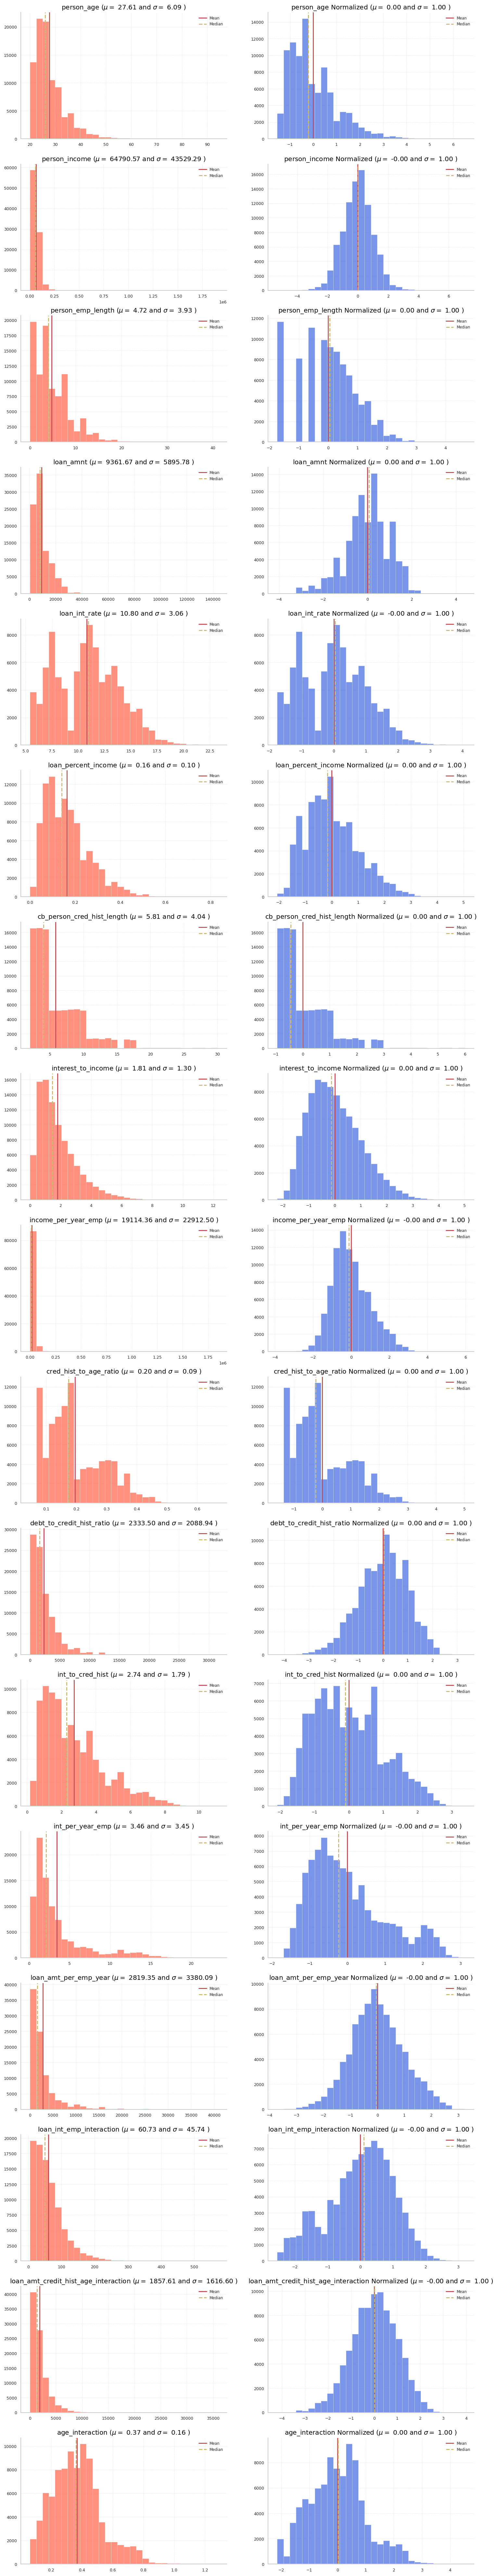

In [110]:
t = Transform()
X, X_enc, y, test, test_enc, cat_features = t()

In [89]:
X.shape, X_enc.shape, test.shape, test_enc.shape

((91050, 18), (91050, 18), (39098, 18), (39098, 18))

In [90]:
X_enc.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_default_on_file,0


In [49]:
X_enc[X_enc["cred_hist_to_age_ratio"]>8.0]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,interest_to_income,income_per_year_emp,cred_hist_to_age_ratio,debt_to_credit_hist_ratio,int_to_cred_hist


In [50]:
X[X.loan_to_income<-20]

AttributeError: 'DataFrame' object has no attribute 'loan_to_income'